In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt

In [2]:
pop1 = pd.read_csv('Catalogues/NGC5822_GMM_Population1.csv')
pop1

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,225.442108,-55.148990,5881604188883544576,1.2438,-7.670,-5.493,31,1.535,NaN,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.224959,225.442167,-55.148965,1.284711
1,225.686351,-55.031650,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,NaN,0.900,12.566382,12.794354,12.190967,0.603388,NaN,-36.066614,225.686412,-55.031625,1.217252
2,225.366839,-55.068265,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,NaN,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.164123,225.366898,-55.068240,1.231306
3,225.548609,-55.043570,5881622532624231936,1.1740,-7.527,-5.648,31,1.585,NaN,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.104980,225.548668,-55.043545,1.205017
4,225.605571,-54.861117,5881626007319228160,1.2198,-7.673,-5.630,31,1.532,NaN,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.922417,225.605630,-54.861092,1.260643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,226.213583,-53.447141,5887848384129229184,1.1513,-7.497,-5.898,31,1.479,NaN,1.009,15.396859,15.896158,14.730797,1.165361,NaN,-34.471440,226.213638,-53.447115,1.192632
518,226.890429,-53.453414,5887859379239643136,1.1418,-7.203,-5.466,31,1.474,NaN,0.969,15.680253,16.201763,15.002249,1.199514,NaN,-34.343715,226.890482,-53.453389,1.183305
519,226.955972,-53.337447,5887862437256649856,1.2007,-7.456,-5.318,31,1.469,NaN,1.017,15.779184,16.311586,15.086744,1.224842,NaN,-34.221346,226.956028,-53.337423,1.242246
520,224.140026,-54.880028,5893667927360541184,1.2764,-7.753,-5.537,31,1.526,NaN,0.980,14.038791,14.427249,13.468574,0.958675,-26.87,-36.234268,224.140086,-54.880003,1.316992


In [3]:
pop2 = pd.read_csv('Catalogues/NGC5822_GMM_Population2.csv')
pop2

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,225.442108,-55.148990,5881604188883544576,1.2438,-7.670,-5.493,31,1.535,NaN,0.917,14.326471,14.695655,13.779744,0.915911,-18.57,-36.224959,225.442167,-55.148965,1.284711
1,225.686351,-55.031650,5881612190342982784,1.1881,-7.819,-5.619,31,1.604,NaN,0.900,12.566382,12.794354,12.190967,0.603388,NaN,-36.066614,225.686412,-55.031625,1.217252
2,225.366839,-55.068265,5881617108146265088,1.1905,-7.601,-5.641,31,1.543,NaN,0.991,14.009442,14.363049,13.482981,0.880068,-39.67,-36.164123,225.366898,-55.068240,1.231306
3,225.548609,-55.043570,5881622532624231936,1.1740,-7.527,-5.648,31,1.585,NaN,0.923,12.961983,13.230419,12.532622,0.697797,-30.59,-36.104980,225.548668,-55.043545,1.205017
4,225.605571,-54.861117,5881626007319228160,1.2198,-7.673,-5.630,31,1.532,NaN,0.883,14.197813,14.571778,13.651608,0.920171,-25.21,-35.922417,225.605630,-54.861092,1.260643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,224.746220,-53.610175,5899796708259124352,1.2995,-7.758,-5.572,31,1.526,NaN,0.930,14.170815,14.560180,13.609451,0.950728,4.13,-34.920681,224.746279,-53.610151,1.340445
595,225.055878,-53.182328,5899835775283387136,1.1455,-7.159,-5.756,31,1.556,NaN,0.984,13.477468,13.800722,12.986613,0.814109,-56.52,-34.455467,225.055931,-53.182302,1.186468
596,224.813303,-53.151743,5899845396010785920,1.2183,-7.914,-5.132,31,1.533,NaN,0.947,14.380452,14.750266,13.825043,0.925223,0.18,-34.476388,224.813362,-53.151720,1.259558
597,225.981860,-52.964491,5899886765128211200,1.2670,-7.827,-5.348,31,1.574,NaN,0.978,13.357611,13.645534,12.906324,0.739209,-32.35,-34.062790,225.981918,-52.964467,1.308210


## Plotting their CMDS

Text(0.5, 0, 'BP - RP (mag)')

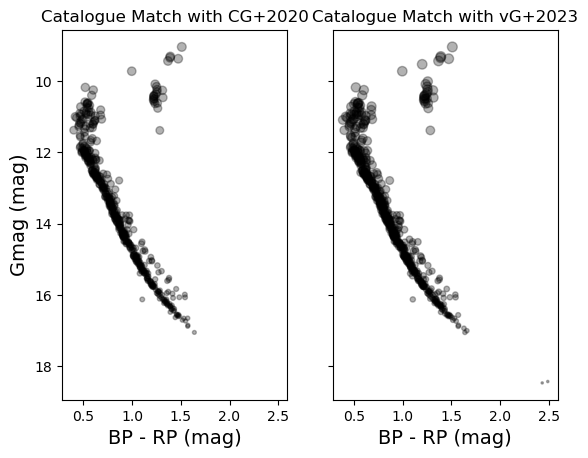

In [4]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True)

ax[0].set_title('Catalogue Match with CG+2020')
ax[0].scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax[0].set_xlabel('BP - RP (mag)',fontsize=14)
ax[0].set_ylabel('Gmag (mag)',fontsize=14)
ax[0].invert_yaxis()

ax[1].set_title('Catalogue Match with vG+2023')
ax[1].scatter(pop2['BP-RP'],pop2.Gmag, s=(19-pop2.Gmag)*5, c='k', alpha=0.3)
ax[1].set_xlabel('BP - RP (mag)',fontsize=14)

### Adjusting the isochrones

In [6]:
#reading the table of isochrones
iso = ascii.read("Catalogues/isochrones.csv")

In [17]:
kk, = np.where(iso["logAge"] == 8.95001)  #binaries
jj, = np.where(iso["logAge"] == 9.00001)
ll, = np.where(iso["logAge"] == 9.05001)  #turn

iso_sel1 = iso[kk]
iso_sel2 = iso[jj]
iso_sel3 = iso[ll]

In [30]:
EBV = 0.124
AV = 3.1 * EBV

# Modulo da distancia em Mpc modificado de Sun. et al 2019 (https://iopscience.iop.org/article/10.3847/1538-4357/ab16e4)
Md = 9.6

DY = Md + 0.8363*AV
DX = (1.083-0.634)*AV

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

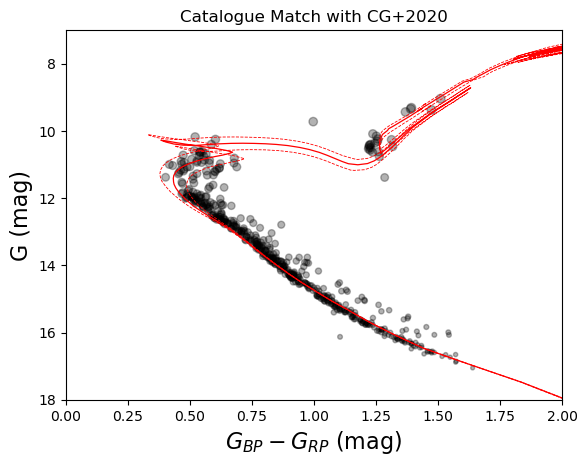

In [31]:
fig, ax = plt.subplots()
ax.set_title("Catalogue Match with CG+2020")
ax.scatter(pop1['BP-RP'],pop1.Gmag, s=(19-pop1.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 2.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

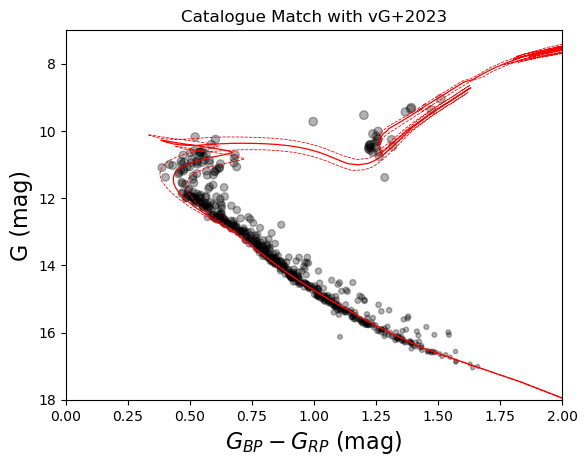

In [32]:
fig, ax = plt.subplots()
ax.set_title("Catalogue Match with vG+2023")
ax.scatter(pop2['BP-RP'],pop2.Gmag, s=(19-pop2.Gmag)*4,c='k', alpha=0.3)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='r',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='r',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 2.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)